In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

# The Following are the Business Questions that are to be Answered:

    # Q1: Depict annual profit trends
    # Q2: Display top 5 most profitable crops
    # Q3: Show the distribution of debt
    # Q4: Show the crops being grown by each farmer
    # Q5: Show seasonal analysis
    # Q6: Display top 5 farmers with the most profit
    # Q7: Represent production to expense comparison of a crop specific between farmers


# Importing Libraries  

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

from sklearn import tree
from ipykernel import kernelapp as app
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

#  Data Importing

In [5]:
#loading the csv
df=pd.read_csv("/content/AgrcultureDataset.csv",encoding = "ISO-8859-1")
df.dtypes

Farmer_Name       object
District_Name     object
Survey_Number     object
Area             float64
Crop_Year          int64
Season            object
Crop              object
Production        object
Income             int64
Expense            int64
Profit             int64
Debt               int64
dtype: object

# Data preparation and encoding

In [6]:
# Agricultural Production Dataset
df.head()

,Farmer_Name,District_Name,Survey_Number,Area,Crop_Year,Season,Crop,Production,Income,Expense,Profit,Debt
0,Ali,NICOBARS,K66C72,1254.0,2020,Kharif,Arecanut,2000,43362,37764,-5598,3412
1,Ali,NICOBARS,N80M81,2.0,2020,Kharif,Other Kharif pulses,1,58126,48135,-9991,6529
2,Ali,NICOBARS,N71L69,102.0,2020,Kharif,Rice,321,99798,88054,-11744,3429
3,Ali,NICOBARS,I84E78,176.0,2020,Whole Year,Banana,641,84869,40047,-44822,1789
4,Ali,NICOBARS,U88D75,720.0,2020,Whole Year,Cashewnut,165,8642,57520,48878,8255


Q1: Depict annual profit trends

In [7]:
df['Profit'] = pd.to_numeric(df['Profit'], errors = 'coerce')

In [43]:
profit_per_year = data.groupby('Crop_Year')['Profit'].sum().reset_index()

In [45]:
sorted_data = data.sort_values(by='Profit', ascending=True)
sorted_data

,Profit
Crop_Year,
2015,-4136.544484
2022,-2960.651782
2023,-2813.023373
2018,-2807.520305
2014,-2658.330083
2008,-2639.347079
2010,-2629.848774
2017,-2601.279806
2019,-2569.127011


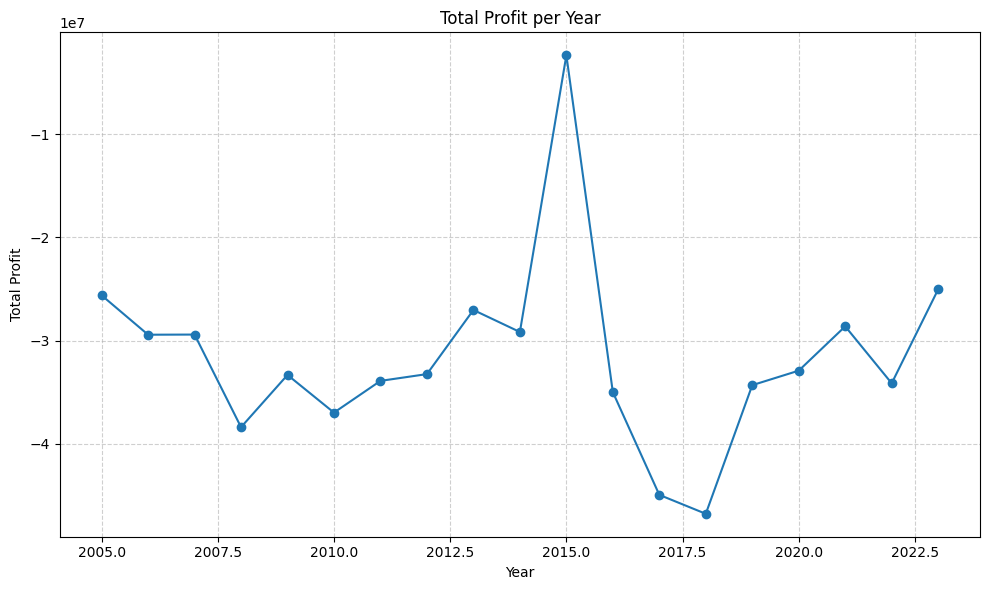

In [49]:
# Load the CSV file into a DataFrame
data = pd.read_csv('/content/AgrcultureDataset.csv')

# Group the data by Crop_Year and calculate the total profit for each year
profit_per_year = data.groupby('Crop_Year')['Profit'].sum().reset_index()

# Create a line chart to visualize the total profit per year
plt.figure(figsize=(10, 6))
plt.plot(profit_per_year['Crop_Year'], profit_per_year['Profit'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.title('Total Profit per Year')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Q2: Display top 5 most profitable crops

In [10]:
df['Profit'] = pd.to_numeric(df['Profit'], errors = 'coerce')

In [11]:
data1 = df.groupby(['Crop'])[['Profit']].mean()

In [12]:
sorted_data1 = data1.sort_values(by='Profit', ascending=False)
sorted_data1

,Profit
Crop,
Peach,31068.750000
Ricebean (nagadal),26493.100000
Apple,15134.500000
Arcanut (Processed),13287.150000
Cashewnut Processed,13030.142857
...,...
Pear,-16105.500000
Rajmash Kholar,-17685.055556
Perilla,-22615.555556


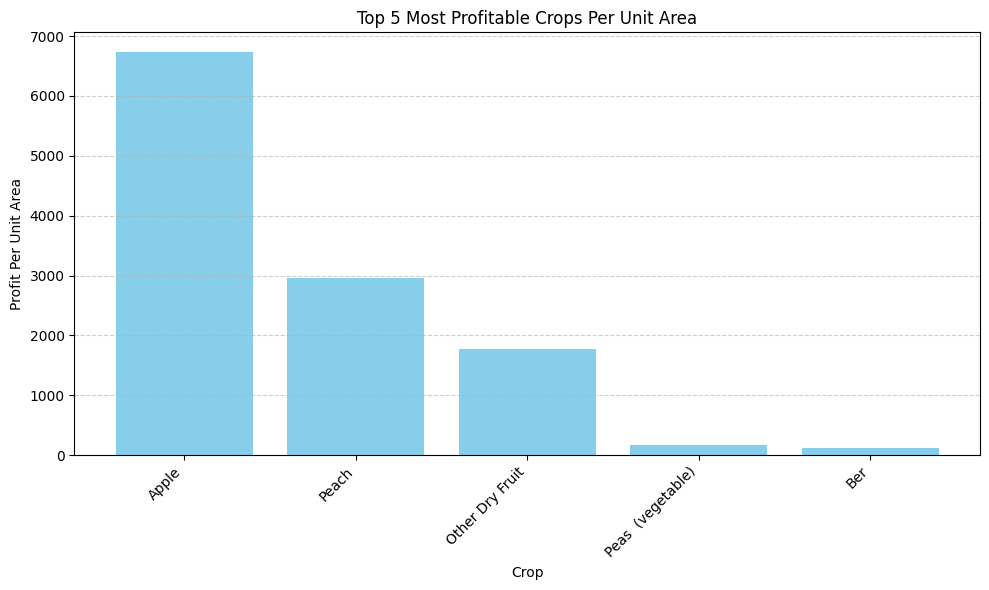

In [56]:
data = pd.read_csv('/content/AgrcultureDataset.csv')

# Group the data by Crop and calculate the average profit per unit area for each crop
profit_per_area = (data.groupby('Crop')['Profit'].sum() / data.groupby('Crop')['Area'].sum()).reset_index()
profit_per_area.columns = ['Crop', 'Profit_Per_Unit_Area']

# Sort the data by profit per unit area in descending order
profit_per_area = profit_per_area.sort_values(by='Profit_Per_Unit_Area', ascending=False)

# Select the top 5 most profitable crops per unit area
top_5_profitable_crops = profit_per_area.head(5)

# Create a bar chart to visualize the top 5 most profitable crops per unit area
plt.figure(figsize=(10, 6))
plt.bar(top_5_profitable_crops['Crop'], top_5_profitable_crops['Profit_Per_Unit_Area'], color='skyblue')
plt.xlabel('Crop')
plt.ylabel('Profit Per Unit Area')
plt.title('Top 5 Most Profitable Crops Per Unit Area')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Q3: Show the distribution of debt

In [13]:
farmer_debt = df.groupby('Farmer_Name')['Debt'].sum().reset_index()

In [14]:
sorted_farmer_debt = farmer_debt.sort_values(by='Debt', ascending=False)
sorted_farmer_debt

,Farmer_Name,Debt
30,Uttar Pradesh,174919718
16,Madhya Pradesh,120858798
14,Karnataka,111268407
4,Bihar,99292661
3,Assam,76392235
27,Tamil Nadu,71164407
22,Odisha,70943574
17,Maharashtra,66640832
25,Rajasthan,65915033
9,Hamid,56583882


The most indebted farmer is: Uttar Pradesh
Total Debt: 174919718


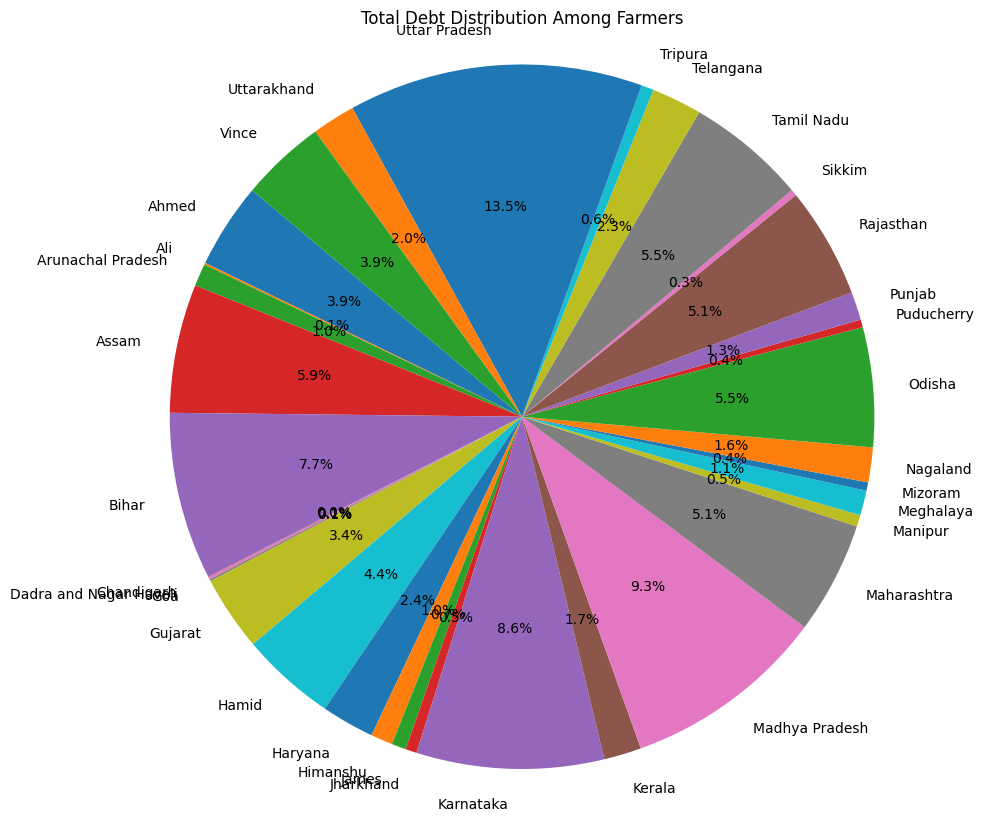

In [29]:
# Load the CSV file into a DataFrame
data = pd.read_csv('/content/AgrcultureDataset.csv')

# Group the data by Farmer_Name and calculate the total debt for each farmer
debt_data = data.groupby('Farmer_Name')['Debt'].sum().reset_index()

# Find the farmer with the highest total debt
most_indebted_farmer = debt_data.loc[debt_data['Debt'].idxmax()]

# Print the most indebted farmer
print("The most indebted farmer is:", most_indebted_farmer['Farmer_Name'])
print("Total Debt:", most_indebted_farmer['Debt'])

# Create a pie chart to visualize the total debt distribution among farmers
plt.figure(figsize=(10, 10))
plt.pie(debt_data['Debt'], labels=debt_data['Farmer_Name'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Total Debt Distribution Among Farmers')
plt.show()

Q4: Show the crops being grown by each farmer

In [ ]:
name_counts = df['Farmer_Name'].value_counts().reset_index()
name_counts.columns = ['Farmer_Name', 'Total_Contracts']

In [ ]:
name_counts

,Farmer_Name,Total_Contracts
0,Uttar Pradesh,33306
1,Madhya Pradesh,22943
2,Karnataka,21122
3,Bihar,18885
4,Assam,14628
5,Odisha,13575
6,Tamil Nadu,13547
7,Maharashtra,12628
8,Rajasthan,12514
9,Hamid,10709


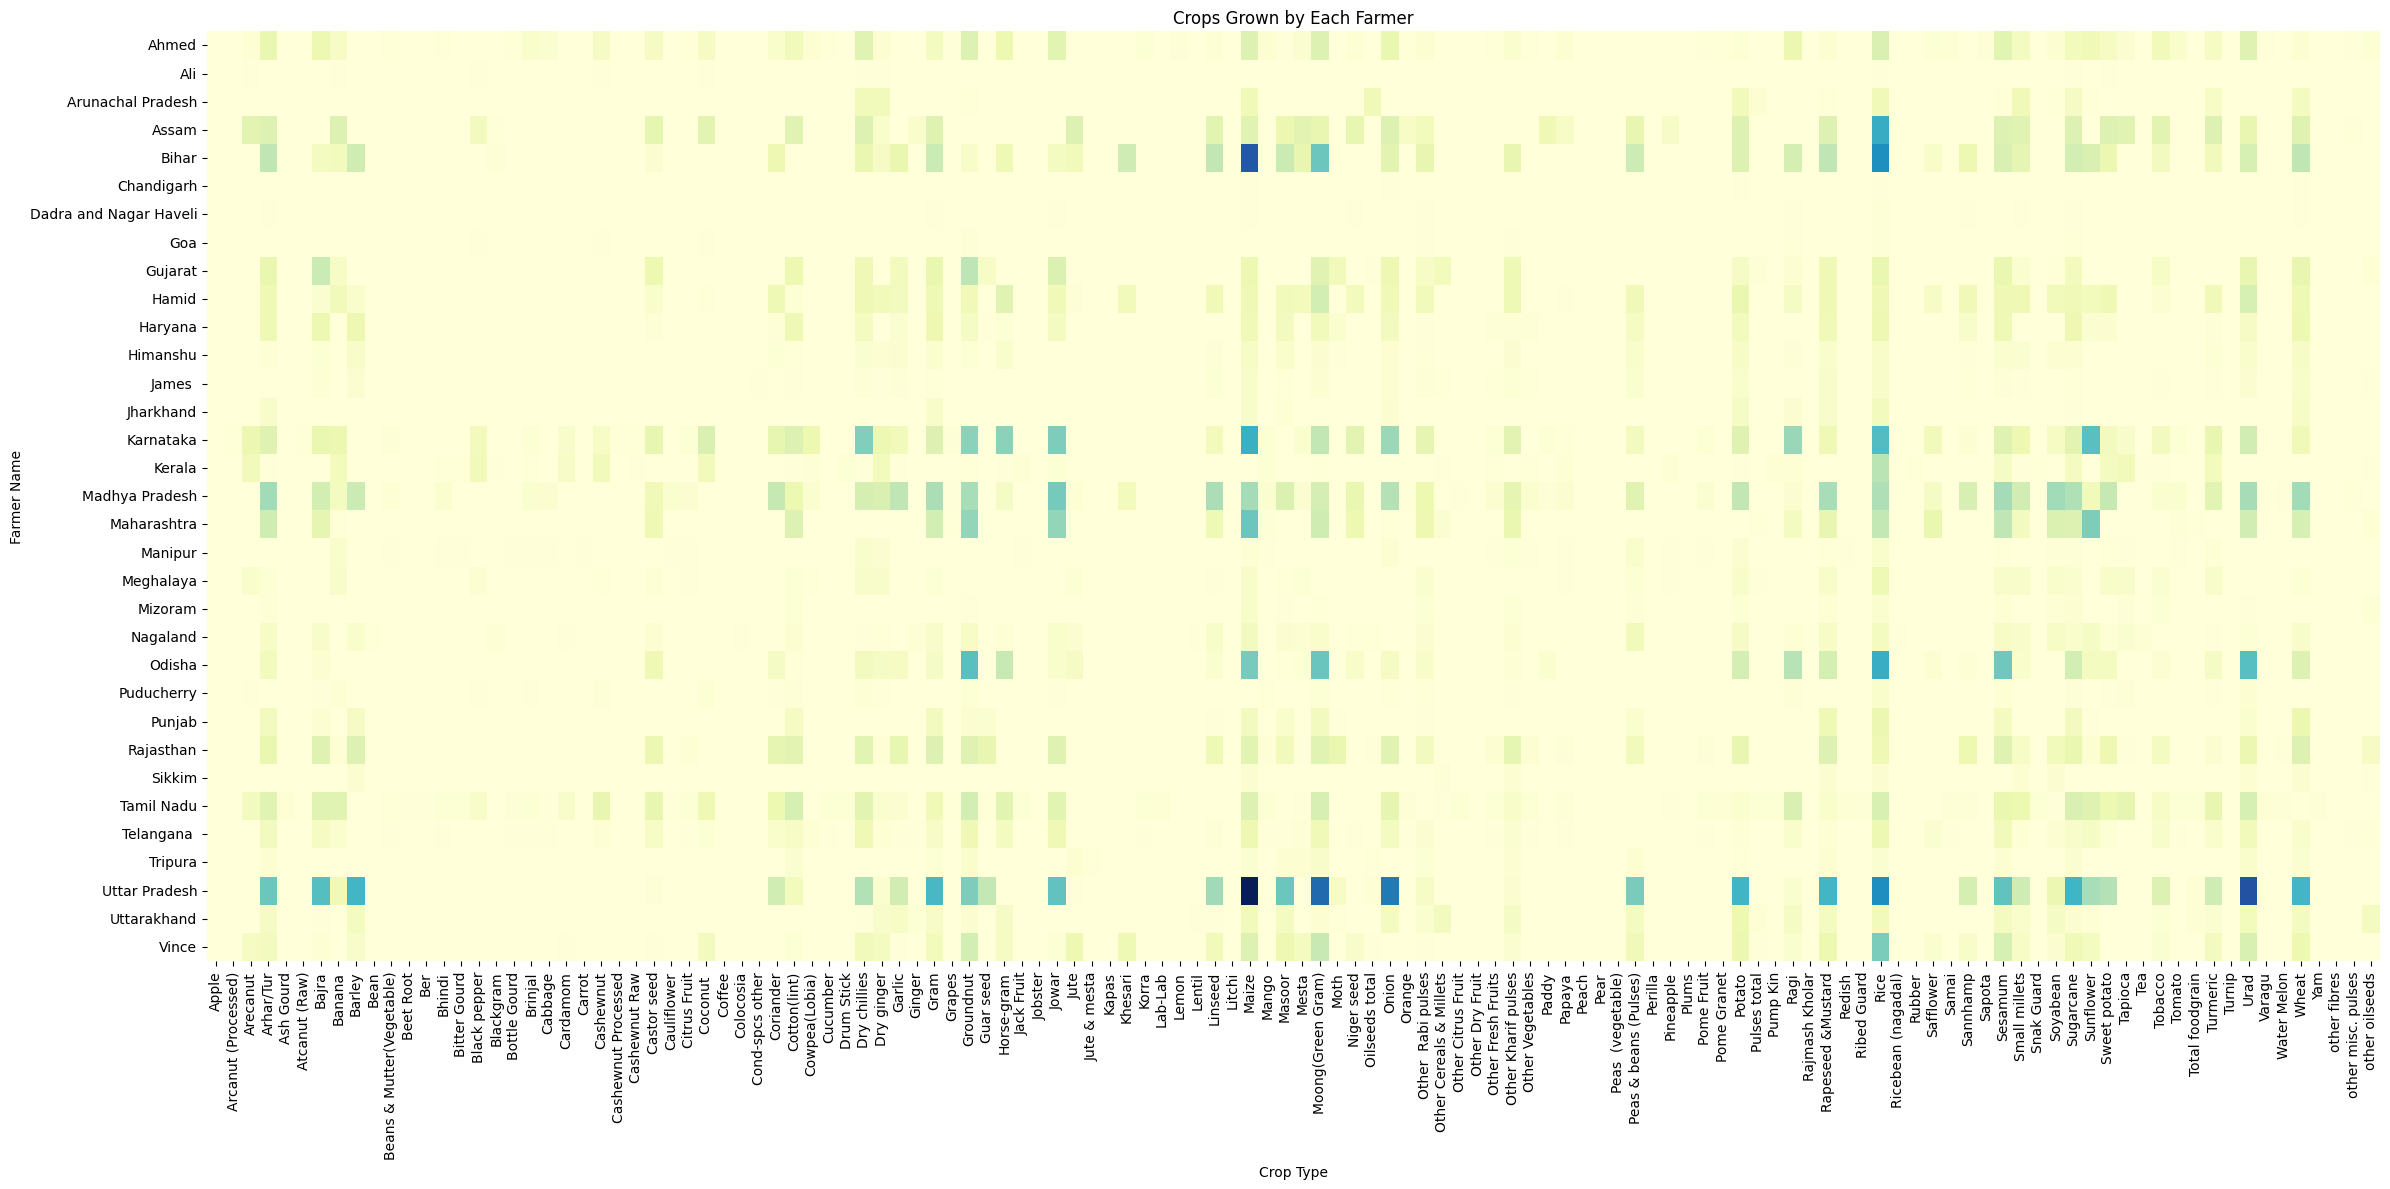

In [65]:
data = pd.read_csv('/content/AgrcultureDataset.csv')

# Create a pivot table to represent the crops grown by each farmer
pivot_table = pd.pivot_table(data, index='Farmer_Name', columns='Crop', aggfunc='size', fill_value=0)

# Create a heatmap to visualize the crops grown by each farmer
plt.figure(figsize=(24, 12))
sns.heatmap(pivot_table, cmap='YlGnBu', cbar=False)
plt.xlabel('Crop Type')
plt.ylabel('Farmer Name')
plt.title('Crops Grown by Each Farmer')
plt.tight_layout()
plt.show()

Q5: Show seasonal analysis

In [ ]:
df['Profit'] = pd.to_numeric(df['Profit'], errors = 'coerce')

In [ ]:
district_data = df.groupby(['District_Name'])[['Profit']].mean()

In [ ]:
sorted_district_data = district_data.sort_values(by='Profit', ascending=False)
sorted_district_data

,Profit
District_Name,
HYDERABAD,31595.500000
NAMSAI,24660.000000
SHOPIAN,11219.000000
SARAIKELA KHARSAWAN,9735.857143
KHUNTI,8937.166667
...,...
DEOGHAR,-11442.700000
UNAKOTI,-13518.596774
N&MA,-16410.720000


In [75]:
data = pd.read_csv('/content/AgrcultureDataset.csv')

# Group the data by Season and calculate the mean values for each season
seasonal_data = data.groupby('Season')[['Production', 'Income', 'Expense', 'Profit']].mean().reset_index()

# Define the order of seasons for better visualization (you can customize this based on your data)
season_order = ['Kharif', 'Whole Year', 'Rabi', 'Summer']

# Create a line chart to visualize the seasonal trends
plt.figure(figsize=(10, 6))

# Plot Production
plt.plot(seasonal_data['Season'], seasonal_data['Production'], label='Production')
# Plot Income
plt.plot(seasonal_data['Season'], seasonal_data['Income'], label='Income')
# Plot Expense
plt.plot(seasonal_data['Season'], seasonal_data['Expense'], label='Expense')
# Plot Profit
plt.plot(seasonal_data['Season'], seasonal_data['Profit'], label='Profit')

plt.xlabel('Season')
plt.ylabel('Average Value')
plt.title('Seasonal Analysis of Agricultural Metrics')
plt.legend()
plt.xticks(rotation=45, ha='right', labels=season_order)  # Customize the x-axis labels
plt.tight_layout()
plt.show()

<ipython-input-75-a4b4a179fe48>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  seasonal_data = data.groupby('Season')[['Production', 'Income', 'Expense', 'Profit']].mean().reset_index()


KeyError: ignored

<Figure size 1000x600 with 0 Axes>

Q6: Display top 5 farmers with the most profit

In [17]:
df['Profit'] = pd.to_numeric(df['Profit'], errors = 'coerce')

In [18]:
farmer_profit = df.groupby(['Farmer_Name'])[['Profit']].mean()

In [19]:
sorted_farmer_profit = farmer_profit.sort_values(by='Profit', ascending=False)
sorted_farmer_profit

,Profit
Farmer_Name,
Dadra and Nagar Haveli,138.566540
Mizoram,-731.367816
James,-789.848837
Jharkhand,-1200.895735
Haryana,-1581.285106
Odisha,-1680.918895
Uttarakhand,-2050.644812
Nagaland,-2152.632616
Tamil Nadu,-2245.105411


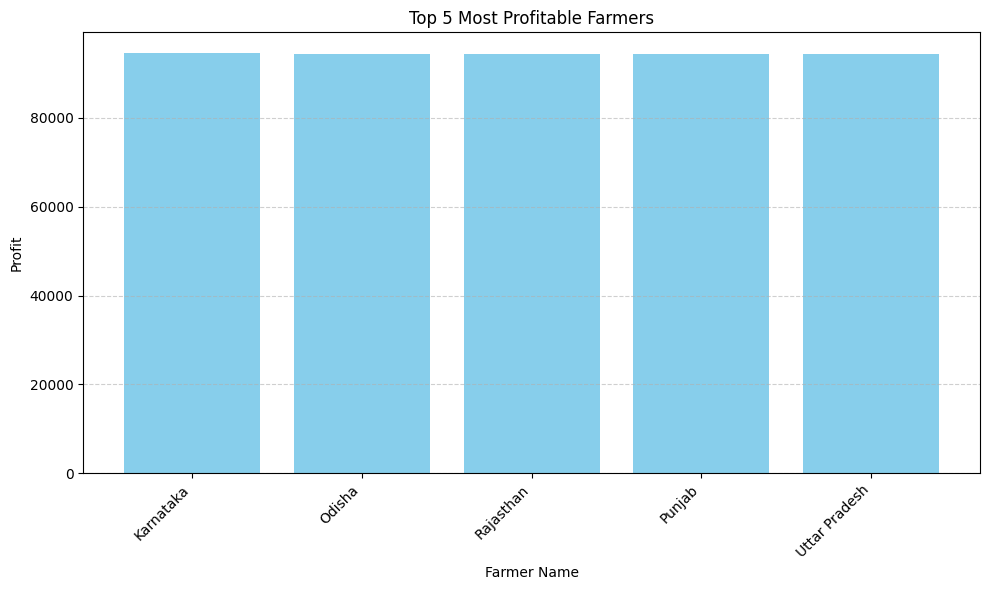

In [58]:
data = pd.read_csv('/content/AgrcultureDataset.csv')

# Sort the data by profit in descending order
sorted_data = data.sort_values(by='Profit', ascending=False)

# Select the top 5 farmers with the most profit
top_5_profitable_farmers = sorted_data.head(5)

# Create a bar chart to visualize the top 5 profitable farmers
plt.figure(figsize=(10, 6))
plt.bar(top_5_profitable_farmers['Farmer_Name'], top_5_profitable_farmers['Profit'], color='skyblue')
plt.xlabel('Farmer Name')
plt.ylabel('Profit')
plt.title('Top 5 Most Profitable Farmers')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Q7: Represent production to expense comparison of a crop specufic between farmers

In [37]:
crop_name = 'Coffee'
filtered_data = df[df['Crop'] == crop_name]

# Group the filtered data by Survey_Number and calculate the total expense and total area
grouped_data = filtered_data.groupby('Survey_Number').agg({'Expense': 'sum', 'Area': 'sum'})

# Calculate the area-to-expense ratio
grouped_data['Area_to_Expense_Ratio'] = grouped_data['Area'] / grouped_data['Expense']

sorted_grouped_data = grouped_data.sort_values(by='Area_to_Expense_Ratio', ascending=False)
sorted_grouped_data

,Expense,Area,Area_to_Expense_Ratio
Survey_Number,,,
I77W75,50274,67510.0,1.342841
K65P66,60015,66973.0,1.115938
R67U87,12188,12635.0,1.036675
O73N84,14685,4650.0,0.316650
M69W88,41261,11490.0,0.278471
L67K78,18401,4650.0,0.252704


In [76]:
data = pd.read_csv('/content/AgrcultureDataset.csv')

# Filter the data to include only records where the crop is sugarcane
sugarcane_data = data[data['Crop'] == 'Sugarcane']

# Calculate the production-to-expense ratio for each farmer growing sugarcane
sugarcane_data['Production_to_Expense_Ratio'] = sugarcane_data['Production'] / sugarcane_data['Expense']

# Create a box plot to visualize the distribution of the ratios for sugarcane
plt.figure(figsize=(10, 6))
plt.boxplot(sugarcane_data['Production_to_Expense_Ratio'])
plt.xlabel('Farmers (Sugarcane Crop)')
plt.ylabel('Production-to-Expense Ratio')
plt.title('Production-to-Expense Ratio Comparison for Sugarcane Crop')
plt.xticks([1], ['Sugarcane Production to Expense Ratio'])  # Label the x-axis
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

<ipython-input-76-ef7b4806d1f3>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  crop_yearly_data = crop_data.groupby('Crop_Year')[['Production', 'Income', 'Expense', 'Profit']].mean().reset_index()


KeyError: ignored

<Figure size 1000x600 with 0 Axes>